# Cisco - Ariel University API Security Detection Challenge 2023

## Student ID: 207276775
GitHub project: https://github.com/RazElbaz/API_security_challenge

The site that helped me find algorithms:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### Imports and global settings

In [1]:
# Imports, settings and first dataset view
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 3 # Options are [1, 2, 3, 4]
test_type = 'label' # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly 
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,request.Attack_Tag,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,RCE,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,NaN,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,NaN,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,NaN,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,NaN,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN


## Data organization, data conversion and cleaning unnecessary data

### Finding malicious characters in data

In [2]:
print(df['request.headers.Sec-Fetch-Site'].unique())

['none' nan 'none${jndi:ldapyellowpages.com/kansas-city-ks/restaurants}'
 'none${jndi:ldapoderus.8m.com/uote1.html}'
 'none${jndi:ldapimdb.com/title/tt0034583/}'
 'none${jndi:ldaphttp://51.89.119.154/SBIDIOT/arm}'
 'none${jndi:ldapdisneychannel-tv.com/}'
 'none${jndi:ldapwalnutcreekdowntown.com/index.php?option=com_mtree&task=listcats&cat_id=28&Itemid=54}'
 'none${jndi:ldapartsopolis.com/event/detail/52093/The_Shape_of_Things}'
 'none${jndi:ldaplastbit.com/ntpsw/}'
 'none${jndi:ldapcameraobscur4.tumblr.com/}'
 'none${jndi:ldaprottentomatoes.com/m/1084873-ride_with_the_devil/}'
 'none${jndi:ldapxbox360.gamespy.com/xbox-360/prototype/}'
 'none${jndi:ldaphttp://distractify.com/post/related/id/55039ed24a0c4b373dcaa82d/skip/10/limit/10/back/0}'
 'none${jndi:ldapen.wikipedia.org/wiki/Edward_Hubbard}'
 'none${jndi:ldaphttp://www.pls-print.com/images/index.htm?ref=http:/mfkfujrus.battle.net/d3/en/index}'
 'none${jndi:ldapwikigallery.org/wiki/artist36472/Eugene-von-Guerard/page-1}'
 'none${jndi

In [3]:
print(df['request.headers.Accept-Encoding'].unique())   

['gzip, deflate, br' 'gzip, deflate'
 'gzip, deflate, br${jndi:ldaprootsweb.ancestry.com/~nyoswego/towns/hannibal/hanhistsoc.html}'
 'gzip, deflate, br${jndi:ldapperfectpeople.net/article/557/4449764/chris-farley/net-worth-humor-found-in-site-that-fosters-demotivation-lawrence-journal-world.htm}'
 'gzip, deflate, br${jndi:ldapmanages-purchaseapps-serviceappie.com}'
 'gzip, deflate, br${jndi:ldapen.wikipedia.org/wiki/FA_Youth_Cup}'
 'gzip, deflate, br${jndi:ldaplinkedin.com/pub/dominic-gagn%C3%A9/27/aa/498}'
 'gzip, deflate, br${jndi:ldaphttp://www.thenewspaper.ca/the-editorial.1}'
 'gzip, deflate, br${jndi:ldapcrkn.ca/}'
 'gzip, deflate, br${jndi:ldaptheglobeandmail.com/news/politics/the-senator-the-port-authority-and-the-big-boss-in-quebec/article1995433/}'
 'gzip, deflate, br${jndi:ldapwc.rootsweb.ancestry.com/cgi-bin/igm.cgi?op=REG&db=lisamarlyn&id=I1077}'
 'gzip, deflate, br${jndi:ldaphttp://usbank-link-mupyndtfft---com.illmickelsonbeats.com/getStep.php?id=4a53634f333bbf31c708ee572

In [4]:
print(df['request.headers.Set-Cookie'].unique())

["['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51khqu8iLl4L7jY2Qplfnfzd0mmMJyVBRlZRw42raiEDXKCY-SVl8dcYgiGkbTru2afRBq0jWaYGmgnqXR0laHhSm6gCLv0Bo8tnZV9xOuG7iHgEGE9u5DBJHZmKpXd-HrJg; Domain=localhost:5000; Expires=Fri, 13 Jan 2023 23:59:27 GMT', 'uu=DDdXaAoYoBytwBrAOgLVyqiaIce_e7tqYRn89LYCN1rbneEplyHxfG5fI_dzasshKiyIPDr9YgfsEVBokMykvt2MZ5x__7JkPXDK1TgmxJkww4oOHovWSTykUcMDO9zPRYDjlTzba0L0K4PBH5h-ihC7f4p3wPUMhqYILnZYCoQ; Domain=localhost:5000; Expires=Thu, 29 Dec 2022 23:59:27 GMT', 'session=a5fc966e-3cd8-42d1-82fe-a38c99bfa737; Expires=Thu, 15 Dec 2022 00:29:27 GMT']"
 "['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnriqF7w1hf_V7f8v2xv8sCm3cwsJkIDBDHJiuFArqv06WF3PkE5PSTJ50jRKapuKLbIAUeJx5ZsGsjfXu7S67OrKoV1dlguIaWfXdkUJLO6fXl_GJRL4u17vJ9BHgFo-91tVk; Domain=localhost:5000; Expires=Sat, 14 Jan 2023 00:36:21 GMT', 'uu=aWgTBSu4C8njIRIKpWZy9-pZUyAfsIvumY9KWbSOatfvEeMtkAZimqA6UpW8ScJ5LDrikogpgRYkK3PA4zG3pheo5jGeb-0j2t4CtQvSEnT6G3_4F_GcHpADeFt20Q22lme4WUn9-S5N42ZyuElKMHfe7DDaNdvm6KKRlo-M4Gw; Domain=lo

In [5]:
print(df['request.headers.Sec-Fetch-Dest'].unique())

['document' nan
 'document${jndi:ldapnlfan.yuku.com/topic/4266/LaCock-lambasts-RE}'
 'document${jndi:ldapgenzmania.blogspot.com/2011_04_01_archive.html}'
 'document${jndi:ldapcbs8.com/story/15935548/protesters-target-downtown-oakland-bank-branches}'
 'document${jndi:ldapbiography.com/people/huey-p-newton-37369}'
 'document${jndi:ldapanswers.com/topic/george-gabby-hayes}'
 'document${jndi:ldaphttp://web.de/magazine/unterhaltung/tv-film/avengers-age-of-ultron/avengers-age-of-ultron-30582514}'
 'document${jndi:ldapchecksure.biz/directors-ca-68.htm}'
 'document${jndi:ldapbeemp3.com/index.php?q=arashi}'
 'document${jndi:ldapinternational-shipping.com.au/quote}'
 'document${jndi:ldapabsoluteastronomy.com/topics/2008_Cleveland_Browns_season}'
 'document${jndi:ldaphttp://www.jin0044.com/ipl/app/help.php?GameType=5837&lang=zh-cn&HALLID=3820004&State=0}'
 'document${jndi:ldaphttp://dyetr.com/index.php?option=com_content&view=category&layout=blog&id=46&Itemid=78}'
 'document${jndi:ldaphttp://www.

### Basic dataset label arrangements

In [6]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,RCE,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",NaN,NaN,NaN,NaN,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144495,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) G...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=CUsow_eOa54yp9oNsd1BhZF2lKtgt-PGMG7iBnLba...,"Thu, 15 Dec 2022 00:49:47 GMT",GET,http://127.0.0.1:5000/?res_id=kc66M-9P2z2nOc6C...,,200 OK,text/html; charset=utf-8,34,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
144496,127.0.0.1:5000,python-requests/2.28.1,"gzip, deflate",*/*,keep-alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GET,http://127.0.0.1:5000/bookstore,,200 OK,application/json,41,200,"{""message"": ""Welcome to the Book Store!""}",NaN,NaN,NaN,NaN,Benign,Benign
144497,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.6; r...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=wo-zV78-fKpHPJjNrkXs_EyYZNCJ_VErr0hf4O8l1...,"Thu, 15 Dec 2022 00:47:04 GMT",GET,http://127.0.0.1:5000/greet/Manuel,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,Benign,Benign
144498,127.0.0.1:5000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:24....,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,websocket,?1,document,['ck=2mYff-_R_5fjojY_G5JZQ1uiY-WO6gdfN09c9nH_R...,"Thu, 15 Dec 2022 00:42:00 GMT",GET,http://127.0.0.1:5000/orders/get/random/6,,200 OK,application/json,20,200,"[{}, {}, {}, {}, {}, {}]",NaN,NaN,NaN,NaN,Benign,

In [7]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')
    
# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,response.headers.Set-Cookie,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,de-CH,none,same-origin,?1,document,['ck=yGkqVSrlAG5SQ_fZmLWaNcmRrpqyDTqyfly6jHH51...,"Wed, 14 Dec 2022 23:59:27 GMT",GET,http://127.0.0.1:5000/greet/%7B%7Bget_flashed_...,,200 OK,text/html; charset=utf-8,48,200,text/html; charset=utf-8,None,None,None,None,RCE,Malware
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.5",none,same-origin,?1,document,['ck=CBhNqYCEwU1hN4CAD575di_4AcXDmw9CJAmtkmnri...,"Thu, 15 Dec 2022 00:36:21 GMT",GET,http://127.0.0.1:5000/about/greet?id=8730419.2...,,200 OK,text/html; charset=utf-8,93,200,text/html; charset=utf-8,None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Geck...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=ZQg8nVqE2_D3CUsmSgDblTxzOkazD7RURCvUUcty_...,"Thu, 15 Dec 2022 00:47:40 GMT",GET,http://127.0.0.1:5000/static/download_txt/Inez...,,200 OK,application/json,88,200,"{""error"": ""File Inez.txtfilename=0MGnu5_DtpSPy...",None,None,None,None,Benign,Benign
3,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,"gzip, deflate, br",*/*,keep-alive,"en-US,en;q=0.9,he;q=0.8",none,websocket,?1,document,['ck=3bV7UJGya8WbsvLb5oZMQfCX_kAxzzmCNHYnBZ6gd...,"Thu, 15 Dec 2022 00:45:52 GMT",GET,http://127.0.0.1:5000/categories/check/all?res...,,200 OK,application/json,871,200,"[{""category_id"": ""1"", ""category_name"": ""Bevera...",None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,"gzip, deflate, br",*/*,keep-alive,de,none,websocket,?1,document,['ck=GYA_AaxVnjLo7_TMm5qDgaJwuKEWzzJ3SU3UlNLqY...,"Thu, 15 Dec 2022 00:48:06 GMT",GET,http://127.0.0.1:5000/orders/get/id/4581?id=62...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",None,None,None,None,Benign,Benign


In [8]:
# # Setting features for further feature extraction by choosing columns
# # Some will be "simply" encoded via label encoding and others with HashingVectorizer

SIMPLE_HEADERS = [ 'response.status_code',
                   'request.headers.Host',
                  'request.headers.Sec-Fetch-User',
                  'request.headers.Content-Length' ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['response.headers.Content-Type',
                   'response.body', 
                   'response.headers.Location',
                   'request.headers.Cookie',
                   'request.body',
                   'request.url',
                   'request.method',
                   'response.status' ]


COLUMNS_TO_REMOVE = ['request.headers.User-Agent',
                     'request.headers.Date',
                     'request.headers.Connection',
                     'request.headers.Accept',
                     'response.headers.Set-Cookie',
                     'request.headers.Accept-Language',
                     'request.headers.Sec-Fetch-Mode']


# This is our main preprocessing function that will iterate over all of the chosen 
# columns and run some feature extraction models
def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        df[column] = le.fit_transform(df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        newHVec = h_vec.fit_transform(df[column])
        df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        df.drop(column, axis=1, inplace=True)
    
    # Tagging malicious data characters
    df['request.headers.Accept-Encoding'] = np.where(df['request.headers.Accept-Encoding'].str.contains("jndi"), 1, 0)   
    df['request.headers.Sec-Fetch-Dest'] = np.where(df['request.headers.Sec-Fetch-Dest'].str.contains("jndi:"), 1, 0)
    df['request.headers.Set-Cookie'] = np.where(df['request.headers.Set-Cookie'].str.contains("jndi"), 1, 0)
    df['request.headers.Sec-Fetch-Site'] = np.where(df['request.headers.Sec-Fetch-Site'].str.contains("jndi"), 1, 0)
    return df

#  Convert argument to a numeric type.
df['response.headers.Content-Length'] = pd.to_numeric(df['response.headers.Content-Length'])

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.Accept-Encoding,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.headers.Content-Length,response.headers.Location,request.headers.Cookie,attack_type,label
0,0,0,0,0,0,0,0.0,0.927173,0.0,0.707107,-1.0,48,0,-1.000000,14,-1.0,-1.0,RCE,Malware
1,0,0,0,0,0,0,0.0,0.707107,0.0,0.707107,-1.0,93,0,-1.000000,14,-1.0,-1.0,Benign,Benign
2,0,0,0,0,0,0,0.0,0.707107,0.0,0.707107,-1.0,88,0,0.377964,14,-1.0,-1.0,Benign,Benign
3,0,0,0,0,0,0,0.0,0.000000,0.0,0.707107,-1.0,871,0,-0.255551,14,-1.0,-1.0,Benign,Benign
4,0,0,0,0,0,0,0.0,0.316228,0.0,1.000000,-1.0,31,5,0.000000,14,-1.0,-1.0,Benign,Benign


### cleaning unnecessary data

In [9]:
# removing columns with the same values
print("Before: " ,df.shape)
for col in df.columns:
    if len(df[col].unique()) == 1:
        # print("col drop: ",col)
        df = df.drop(col,axis=1)

print("After: " ,df.shape)

Before:  (144500, 19)
After:  (144500, 17)


In [10]:
# Memory check (For large datasets sometimes the dataframe will exceed the computers resources)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144500 entries, 0 to 144499
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   request.headers.Accept-Encoding  144500 non-null  int32  
 1   request.headers.Sec-Fetch-Site   144500 non-null  int32  
 2   request.headers.Sec-Fetch-User   144500 non-null  int32  
 3   request.headers.Sec-Fetch-Dest   144500 non-null  int32  
 4   request.headers.Set-Cookie       144500 non-null  int32  
 5   request.method                   144500 non-null  float64
 6   request.url                      144500 non-null  float64
 7   request.body                     144500 non-null  float64
 8   response.status                  144500 non-null  float64
 9   response.headers.Content-Length  144500 non-null  int64  
 10  response.status_code             144500 non-null  int64  
 11  response.body                    144500 non-null  float64
 12  re

In [11]:
# Choose the right features
# In our example code we choose all the columns as our feature this can be the right or wrong way to approach the model, you choose.

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Accept-Encoding', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-User', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'request.body', 'response.status', 'response.headers.Content-Length', 'response.status_code', 'response.body', 'request.headers.Content-Length', 'response.headers.Location', 'request.headers.Cookie']


request.headers.Accept-Encoding      int32
request.headers.Sec-Fetch-Site       int32
request.headers.Sec-Fetch-User       int32
request.headers.Sec-Fetch-Dest       int32
request.headers.Set-Cookie           int32
request.method                     float64
request.url                        float64
request.body                       float64
response.status                    float64
response.headers.Content-Length      int64
response.status_code                 int64
response.body                      float64
request.headers.Content-Length       int32
response.headers.Location          float64
request.headers.Cookie             float64
attack_type                         object
label                               object
dtype: object

## Train test split

In [12]:
# Data train and test split preparations. Here we will insert our feature list and label list.
# Afterwards the data will be trained and fitted on the amazing XGBoost model
# X_Train and y_Train will be used for training
# X_test and y_test.T will be used for over fitting checking and overall score testing

# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list].to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(118995, 15) (118995,)
(25505, 15) (25505,)


Counter({'Malware': 16080, 'Benign': 128420})

## Model choosing and fitting

### RandomForestClassifier()

In [13]:
# We choose our model of choice and set it's hyper parameters you can change anything
clf = RandomForestClassifier(n_estimators=100)

# Train Model
clf.fit(X_train, y_train)

# Check data balance and variety
print(sorted(Counter(y_train).items()))

[('Benign', 105753), ('Malware', 13242)]


## plot feature importance

Feature: 0, Score: 0.01908
Feature: 1, Score: 0.01946
Feature: 2, Score: 0.00542
Feature: 3, Score: 0.01736
Feature: 4, Score: 0.05655
Feature: 5, Score: 0.00452
Feature: 6, Score: 0.18263
Feature: 7, Score: 0.00004
Feature: 8, Score: 0.02014
Feature: 9, Score: 0.35757
Feature: 10, Score: 0.06057
Feature: 11, Score: 0.05825
Feature: 12, Score: 0.02752
Feature: 13, Score: 0.05017
Feature: 14, Score: 0.12070


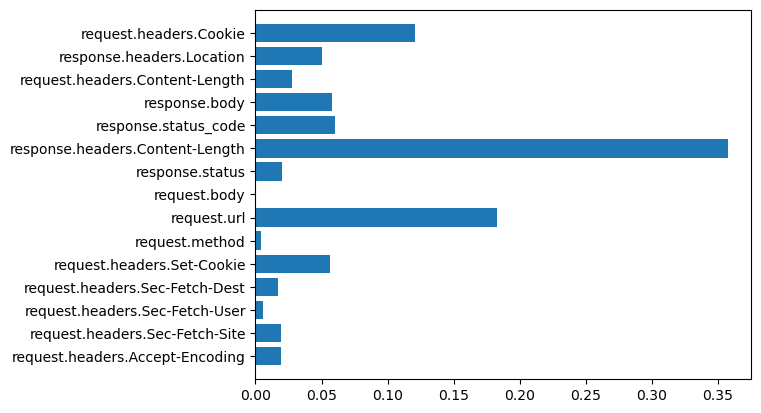

In [14]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.yticks(np.arange(X_train.shape[1]), features_list)
pyplot.ylim([-1, X_train.shape[1]])
pyplot.barh(range(X_train.shape[1]), clf.feature_importances_, align="center")
pyplot.show()

In [15]:
def ResultPrintout(model):
    # We print our results
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    model_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(model_matrix, annot=True, cmap='Blues', fmt='g', 
                          xticklabels=np.unique(true_labels), 
                          yticklabels=np.unique(true_labels)) 

    # The heatmap is cool but this is the most important result
    print(model_report)

## Result printout

              precision    recall  f1-score   support

      Benign    0.98687   0.99131   0.98908     22667
     Malware    0.92800   0.89464   0.91102      2838

    accuracy                        0.98055     25505
   macro avg    0.95743   0.94298   0.95005     25505
weighted avg    0.98032   0.98055   0.98040     25505



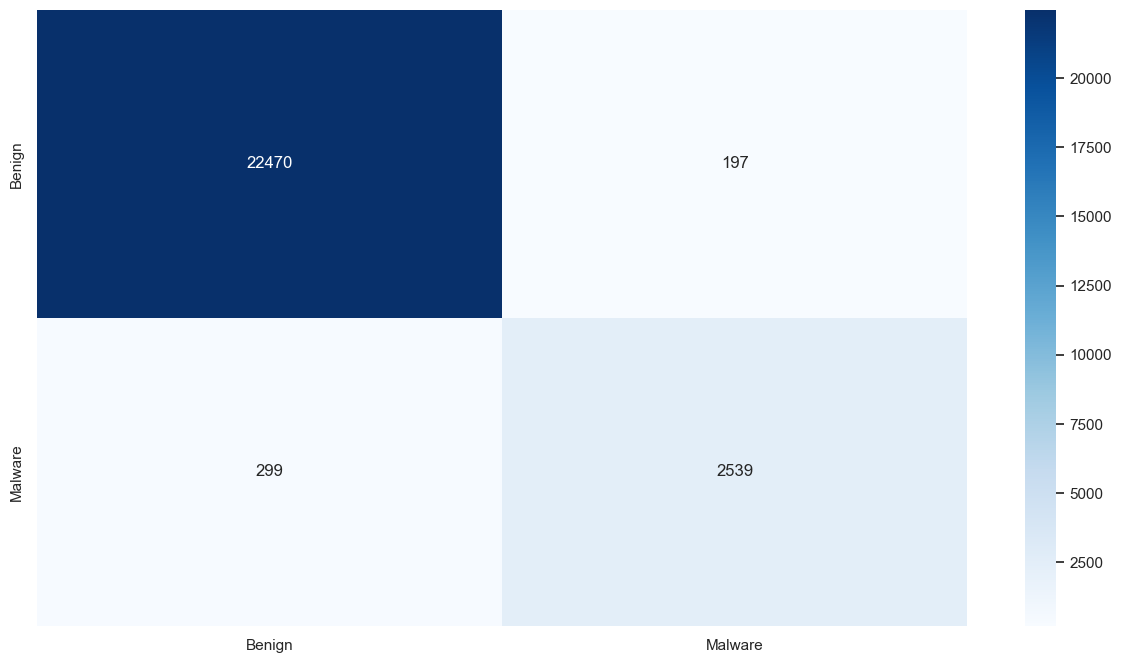

In [16]:
# We print our results
sns.set(rc={'figure.figsize':(15,8)})
predictions = clf.predict(X_test)
true_labels = y_test
cf_matrix = confusion_matrix(true_labels, predictions)
clf_report = classification_report(true_labels, predictions, digits=5)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# The heatmap is cool but this is the most important result
print(clf_report)

C:\Users\97252\anaconda3\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GradientBoostingClassifier(random_state=42)
              precision    recall  f1-score   support

      Benign    0.95407   0.99978   0.97639     22667
     Malware    0.99715   0.61557   0.76122      2838

    accuracy                        0.95703     25505
   macro avg    0.97561   0.80768   0.86880     25505
weighted avg    0.95886   0.95703   0.95245     25505

ExtraTreesClassifier(class_weight='balanced', random_state=42)
              precision    recall  f1-score   support

      Benign    0.99842   0.95041   0.97383     22667
     Malware    0.71385   0.98802   0.82885      2838

    accuracy                        0.95460     25505
   macro avg    0.85614   0.96922   0.90134     25505
weighted avg    0.96676   0.95460   0.95770     25505

AdaBoostClassifier(random_state=42)
              precision    recall  f1-score   support

      Benign    0.95086   0.99709   0.97343     22667
     Malware    0.96198   0.58844   0.73021      2838

    accuracy                        0.9

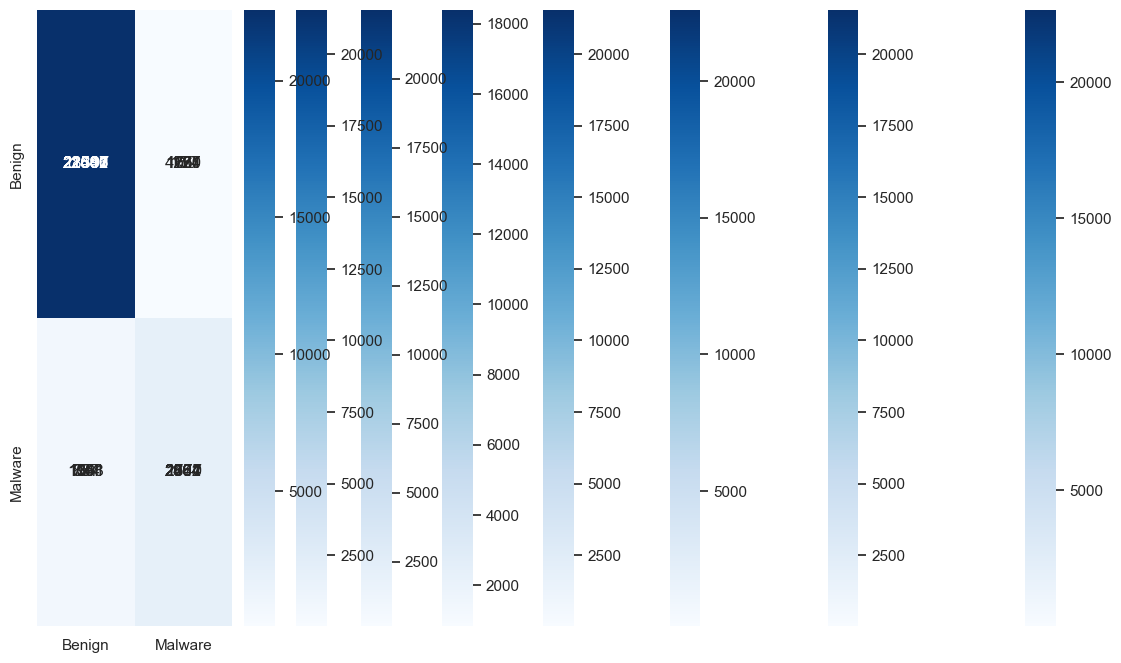

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import timeit
import xgboost 
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

Logistic_Regression =  LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

Decision_Tree =DecisionTreeClassifier(random_state=42, class_weight='balanced')

Random_Forest =  RandomForestClassifier(random_state=42, class_weight='balanced')

Extra_Trees=  ExtraTreesClassifier(random_state=42, class_weight='balanced')

Gradient_Boosting =  GradientBoostingClassifier(random_state=42)

Hist_Gradient_Boosting =  HistGradientBoostingClassifier(random_state=42)

AdaBoost = AdaBoostClassifier(random_state=42)

xgb=xgboost.sklearn.XGBClassifier(max_depth=2)

models={xgb,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}

for model in models:   
    # Train Model
    model.fit(X_train, y_train)
    print(model)
    ResultPrintout(model)


# Choosing the best algorithm

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score
best=0
m=None
models={clf,xgb,Gradient_Boosting,Logistic_Regression,Decision_Tree,Random_Forest,Extra_Trees,Gradient_Boosting,Hist_Gradient_Boosting,AdaBoost}
for i in models:
    print(i)
    sns.set(rc={'figure.figsize':(15,8)})
    predictions = i.predict(X_test)
    true_labels = y_test
    print(accuracy_score(true_labels, predictions)*100)
    if accuracy_score(true_labels, predictions)*100 > best:
        best=accuracy_score(true_labels, predictions)*100
        m=i

        
print("-------")
print(best)
print(m)

RandomForestClassifier()
98.05528327778867
GradientBoostingClassifier(random_state=42)
95.70280337188787
ExtraTreesClassifier(class_weight='balanced', random_state=42)
95.45971378161144
AdaBoostClassifier(random_state=42)
95.16173299353068
DecisionTreeClassifier(class_weight='balanced', random_state=42)
95.44795138208194
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
79.97647520094098
HistGradientBoostingClassifier(random_state=42)
97.8670848853166
RandomForestClassifier(class_weight='balanced', random_state=42)
95.46363458145461
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
 

## Print the result of the best algorithm

              precision    recall  f1-score   support

      Benign    0.98687   0.99131   0.98908     22667
     Malware    0.92800   0.89464   0.91102      2838

    accuracy                        0.98055     25505
   macro avg    0.95743   0.94298   0.95005     25505
weighted avg    0.98032   0.98055   0.98040     25505



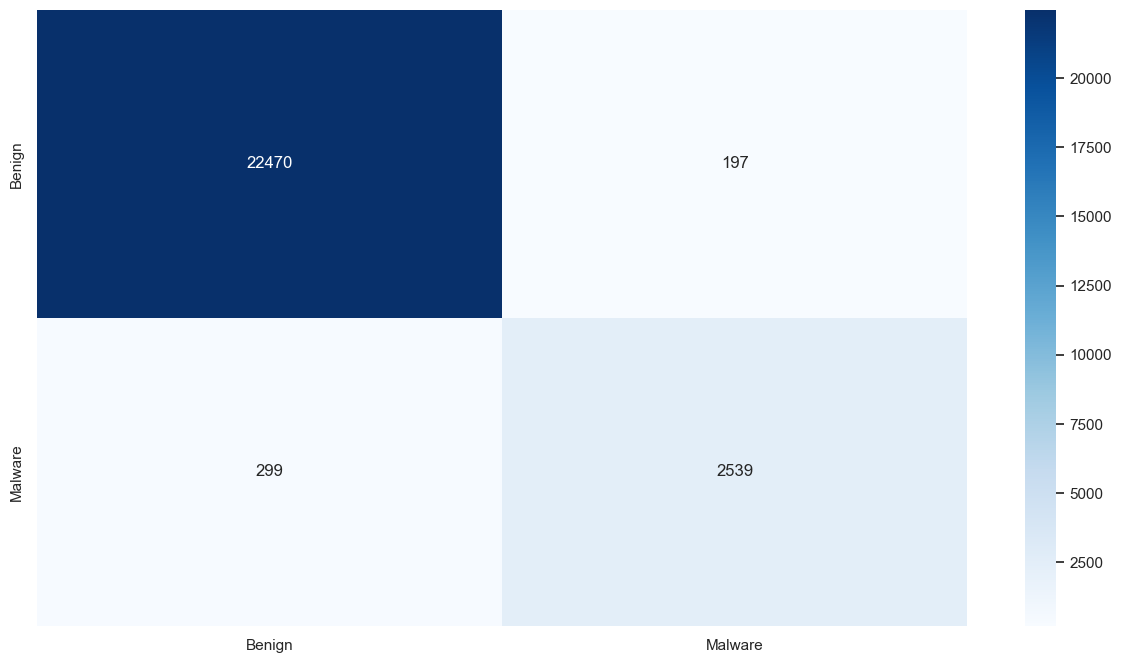

In [19]:
ResultPrintout(m)

# Test

In [20]:
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
for column in test_df.columns[test_df.isna().any()].tolist():
    #df.drop(column, axis=1, inplace=True)
    test_df[column] = test_df[column].fillna('None')
test_df = vectorize_df(test_df)
# change_url(test_df)
# Predict with your model
X = test_df[features_list].to_numpy()
# for i in X.length():
#     if X[i] == 'none':
#         X[i] = 0
print(m)
predictions = m.predict(X)


RandomForestClassifier()


# Save my predictions

In [21]:
# Save your preditions
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt', enc.fit_transform(predictions), fmt='%2d')